### Gaussian Mixture Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.interpolate import fitpack,bisplrep,bisplev
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print ("Packages loaded.")

Packages loaded.


### Util

In [2]:
def grid_2d(x0_min,x0_max,x1_min,x1_max,x0_step,x1_step):
    x0s,x1s = np.meshgrid(np.arange(x0_min,x0_max+x0_step,x0_step),
                          np.arange(x1_min,x1_max+x1_step,x1_step))
    x = np.dstack([x0s,x1s]).reshape(-1,2) 
    return x,x0s,x1s

def add_colorbar(im, aspect=20, pad_fraction=0.5, **kwargs):
    """Add a vertical color bar to an image plot."""
    from mpl_toolkits import axes_grid1
    divider = axes_grid1.make_axes_locatable(im.axes)
    width = axes_grid1.axes_size.AxesY(im.axes, aspect=1./aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    return im.axes.figure.colorbar(im, cax=cax, **kwargs)

def gmm(x,weights,mus,sigmas):
    n = x.shape[0]
    prob = np.zeros(shape=(n,1))
    for i_idx,x_i in enumerate(x):
        p_i = 0
        for weight,mu,sigma in zip(weights,mus,sigmas):
            weight = weight / np.array(weights).sum()
            p_i = p_i + weight*multivariate_normal.pdf(x_i,mean=mu,cov=sigma)
        prob[i_idx,0] = p_i
    return prob
print ("Done.")

Done.


### Gaussian Mixture Model

In [3]:
x,x0s,x1s = grid_2d(x0_min  = -1.5, 
                    x0_max  = 1.5,
                    x1_min  = -1,
                    x1_max  = 1,
                    x0_step = 0.05,
                    x1_step = 0.05) # inputs [N x 2]
prob = gmm(x       = x,
           weights = [1,2,3],
           mus     = [np.array([-1.0,-0.5]),
                      np.array([0.0,0.0]),
                      np.array([1.0,0.5])
                     ],
           sigmas  = [0.1*np.array([[1.0,0.0],[0.0,1.0]]),
                      0.1*np.array([[1.0,0.0],[0.0,1.0]]),
                      0.1*np.array([[1.0,0.0],[0.0,1.0]])
                     ]
          )
print ("gmm ready x:%s prob:%s"%(x.shape,prob.shape))

gmm ready x:(2501, 2) prob:(2501, 1)


In [4]:
# 2D interpolating function
tck = bisplrep(x=x[:,0],y=x[:,1],z=prob/max(prob),s=0.001,kx=3,ky=3)
print ("interp2d ready.")

interp2d ready.


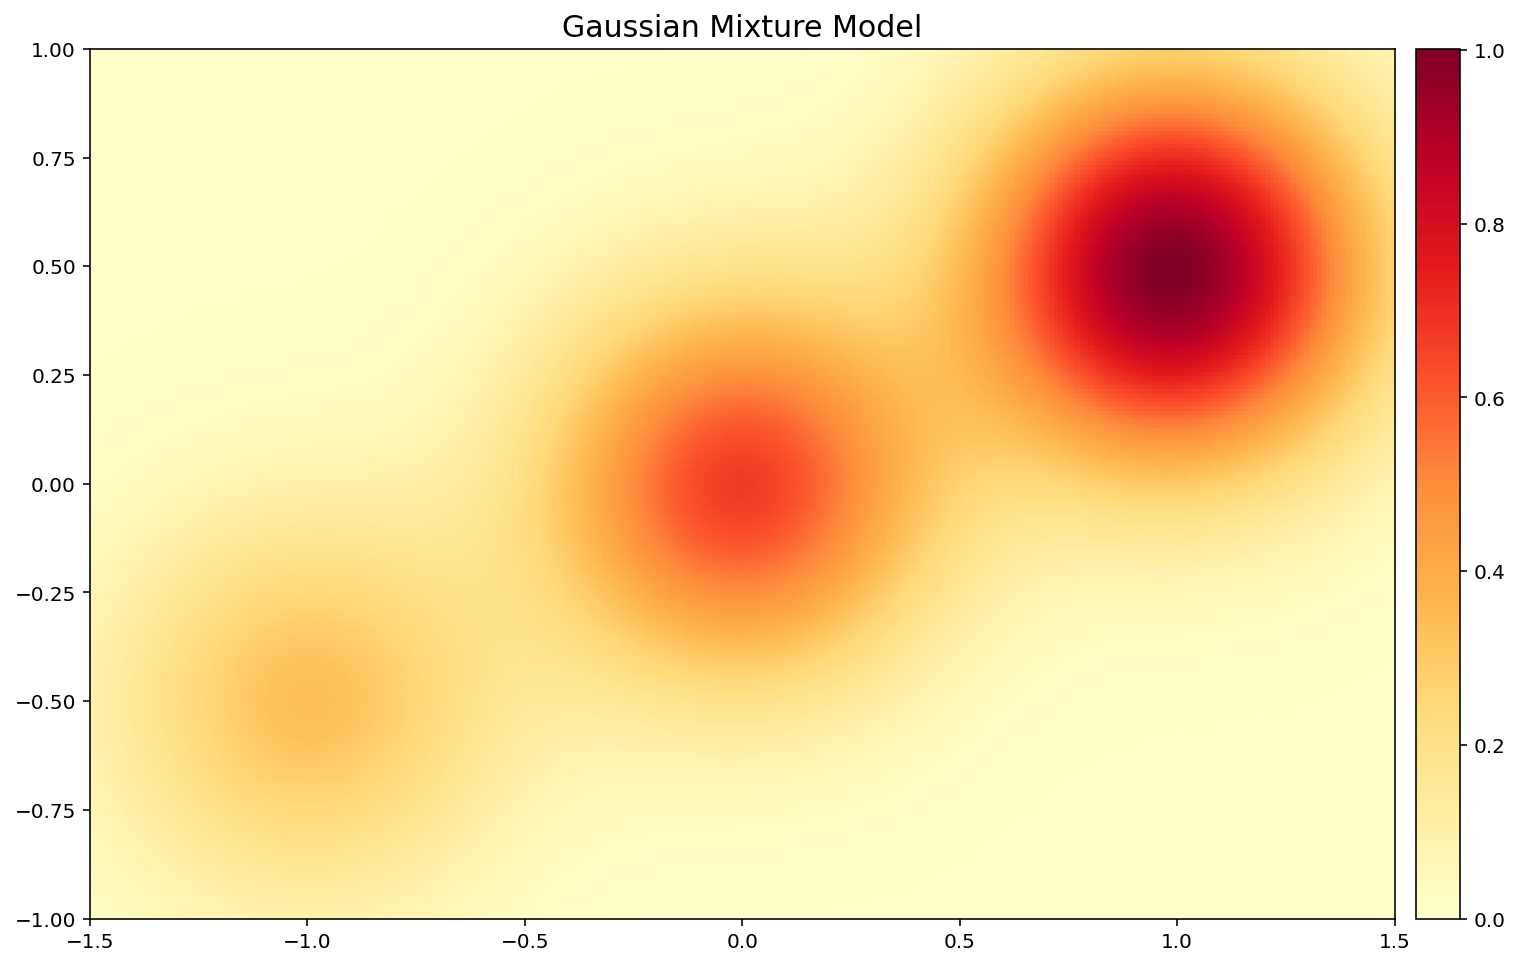

In [5]:
# Plot
x0_min,x0_max,x1_min,x1_max = min(x[:,0]),max(x[:,0]),min(x[:,1]),max(x[:,1])
x0_range,x1_range = (x0_max-x0_min),(x1_max-x1_min)
step = 0.01 # step resolution
Z = bisplev(np.arange(x0_min,x0_max+step,step),np.arange(x1_min,x1_max+step,step),tck).T
plt.figure(figsize = (15,8))
im = plt.imshow(X      = Z,
                extent = [x0_min,x0_max,x1_min,x1_max],
                cmap   = 'YlOrRd',
                origin = 'lower')
plt.title('Gaussian Mixture Model',fontsize=15)
add_colorbar(im)
plt.axis([x0_min,x0_max,x1_min,x1_max])
plt.axis('equal')
plt.show()

### Measurement from the GMM using `bisplev()`

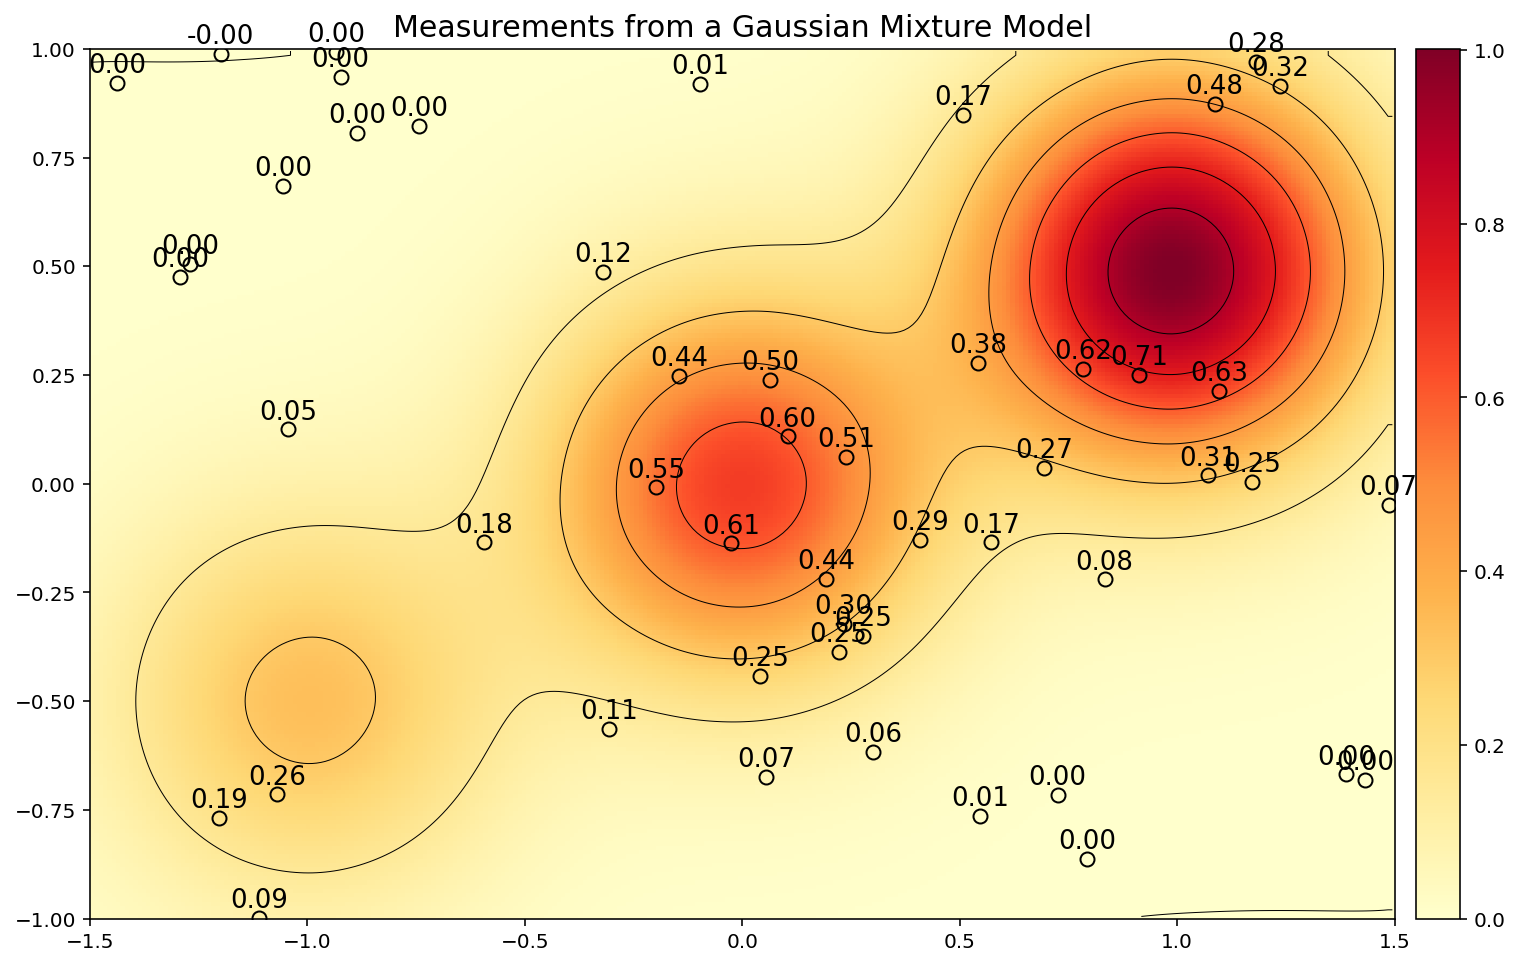

In [10]:
n_meas = 50
x_meas = np.array([x0_min,x1_min]) \
    + np.array([x0_range,x1_range])*np.random.rand(n_meas,2)
y_meas = np.zeros(shape=(n_meas))
for i_idx in range(n_meas):
    y_meas[i_idx] = bisplev(x=x_meas[i_idx,0],y=x_meas[i_idx,1],tck=tck)
    
# Plot
plt.figure(figsize = (15,8))
im = plt.imshow(X      = Z,
                extent = [x0_min,x0_max,x1_min,x1_max],
                cmap   = 'YlOrRd',
                origin = 'lower')
plt.contour(Z,
            extent     = [x0_min,x0_max,x1_min,x1_max],
            origin     = 'lower',
            colors     = 'k',
            linewidths = 1/2)
plt.plot(x_meas[:,0],x_meas[:,1],'o',mfc='none',mec='k',ms=7,lw=2)
for i_idx in range(n_meas):
    y_offset = 0.04
    plt.text(x_meas[i_idx,0],x_meas[i_idx,1]+y_offset,'%.2f'%(y_meas[i_idx]),
             fontsize=13,horizontalalignment='center',verticalalignment='center')
plt.title('Measurements from a Gaussian Mixture Model',fontsize=15)
add_colorbar(im)
plt.axis([x0_min,x0_max,x1_min,x1_max])
plt.axis('equal')
plt.show()